In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/flatironschool/Documents/nyc-ds-010620/Projects/baseball_HR_linear_regression/Loading_Dataset/master_df.csv', index_col=0)

In [3]:
df

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,HR/PA
0,514888,580,10.5,31.6,106.5,85.8,90.2,83.2,410,159,...,0.812,125.0,293,17,9,3,6,8,*4/D,0.033473
1,444876,553,8.3,31.1,106.2,83.5,86.5,81.9,407,154,...,0.614,67.0,196,10,8,11,5,1,*6,0.010264
2,466320,553,9.5,31.6,111.0,89.4,91.2,89.8,455,163,...,0.709,97.0,248,18,2,2,10,2,*7/D,0.021672
3,435079,549,17.4,37.5,105.5,85.6,88.6,83.2,407,189,...,0.770,112.0,267,13,3,0,5,0,*4/D,0.041237
4,519184,536,3.9,35.1,111.4,82.1,86.0,79.7,389,132,...,0.719,98.0,223,5,2,5,3,0,*789,0.005333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,572287,225,17.8,33.3,116.0,89.5,97.1,82.4,454,188,...,0.669,85.0,153,7,6,0,2,0,*2/D,0.031142
199,455139,222,21.6,36.5,107.3,87.8,93.3,80.6,456,206,...,0.757,99.0,151,7,19,0,2,0,2/D,0.038902
200,571976,219,9.2,38.8,112.9,90.3,95.5,85.7,450,171,...,0.763,110.0,139,10,0,0,1,1,579/38D,0.036735
201,431145,207,10.1,22.7,108.7,90.6,95.4,90.0,424,147,...,0.663,86.0,94,7,7,0,0,0,25/67,0.024096


In [4]:
#check how many columns have missing values

# df.isna().sum()

In [8]:
df.columns

Index(['player_id', 'attempts', 'avg_hit_angle', 'anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa', 'full_name', 'year', 'pa', 'bip', 'ba',
       'est_ba', 'est_ba_minus_ba_diff', 'slg', 'est_slg',
       'est_slg_minus_slg_diff', 'woba', 'est_woba',
       'est_woba_minus_woba_diff', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'PA▼', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos Summary', 'HR/PA'],
      dtype='object')

In [9]:
df.pa.describe()

count    860.000000
mean     539.216279
std      105.486476
min      341.000000
25%      450.750000
50%      544.000000
75%      632.000000
max      745.000000
Name: pa, dtype: float64

In [11]:
df.HR.describe()

count    860.000000
mean      18.209302
std        9.991168
min        0.000000
25%       11.000000
50%       17.000000
75%       25.000000
max       59.000000
Name: HR, dtype: float64

In [12]:
df.describe()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,HR/PA
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,...,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,518958.598837,381.067442,11.746279,33.698488,110.770116,88.124535,92.538023,84.922093,437.648837,173.883721,...,0.440794,0.774452,107.195349,214.288372,10.854651,5.219767,1.136047,3.787209,3.291860,0.034403
std,78182.845571,86.591625,4.376940,3.938120,3.196790,2.459652,2.560660,3.022550,19.842979,19.499332,...,0.063579,0.087752,22.341752,58.114480,5.221612,4.083452,1.989227,2.280162,3.769515,0.015806
min,120074.000000,187.000000,-1.200000,22.500000,101.500000,78.600000,83.000000,71.600000,377.000000,118.000000,...,0.279000,0.539000,47.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,457762.000000,311.000000,8.775000,31.000000,108.500000,86.600000,90.900000,82.975000,425.000000,160.000000,...,0.398000,0.716750,92.000000,169.000000,7.000000,2.000000,0.000000,2.000000,1.000000,0.022263
50%,519205.500000,384.000000,11.850000,33.600000,110.700000,88.300000,92.600000,85.000000,437.000000,174.000000,...,0.436000,0.769000,106.000000,211.000000,10.000000,4.000000,0.000000,3.000000,2.000000,0.033524
75%,578428.000000,447.000000,14.825000,36.100000,113.000000,89.700000,94.300000,87.000000,450.000000,187.000000,...,0.480000,0.825000,120.000000,256.250000,14.000000,7.000000,1.250000,5.000000,5.000000,0.045455
max,665742.000000,599.000000,22.700000,49.700000,122.200000,94.900000,100.200000,94.000000,505.000000,231.000000,...,0.690000,1.109000,198.000000,387.000000,28.000000,30.000000,13.000000,15.000000,29.000000,0.092025


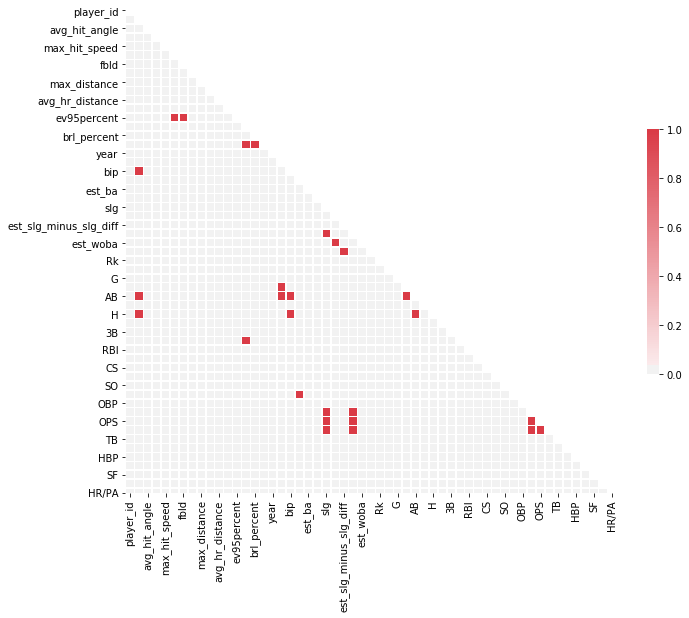

In [35]:
corr = df.corr() > .9
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
df1 = df[['HR','attempts', 'anglesweetspotpercent', 'pa', 'bip', 'slg', 'woba', 'Rk', 'G', 
          'AB', 'R', 'RBI', 'SO', 'SLG', 'TB', 'HR/PA']]

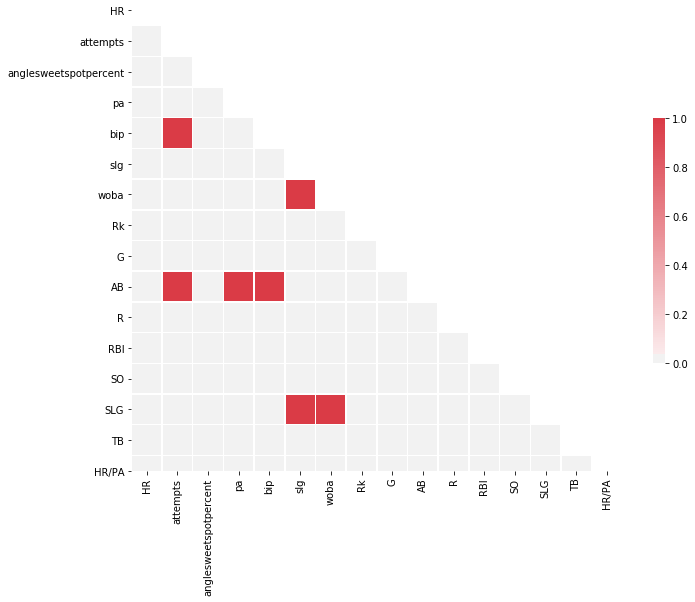

In [36]:
corr = df1.corr() > .9
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# list of numerical variables
num_vars = [var for var in df1.columns if df1[var].dtypes != 'O']

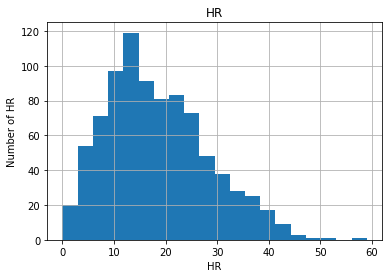

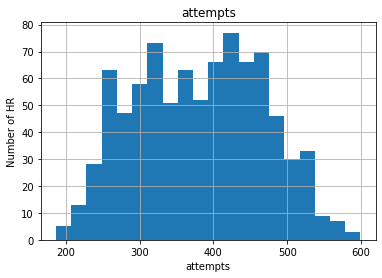

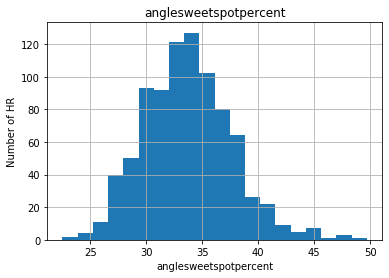

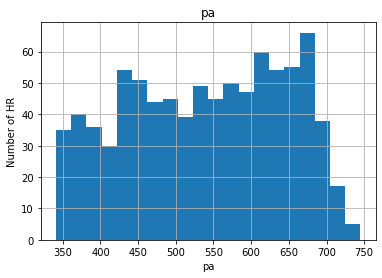

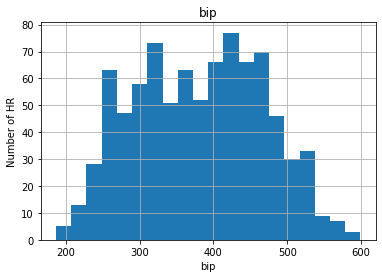

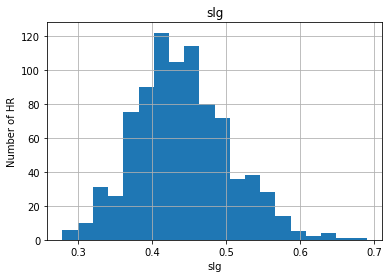

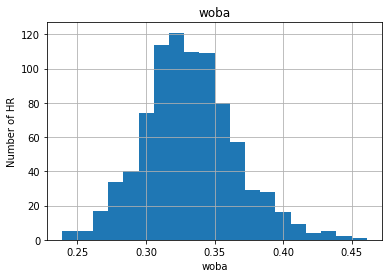

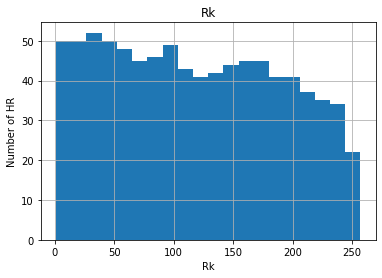

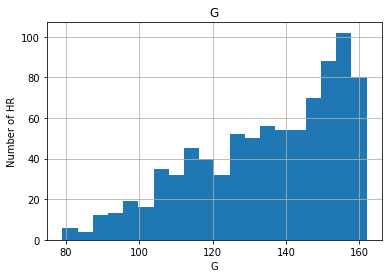

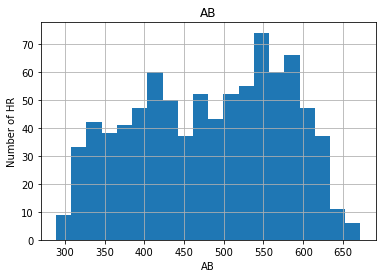

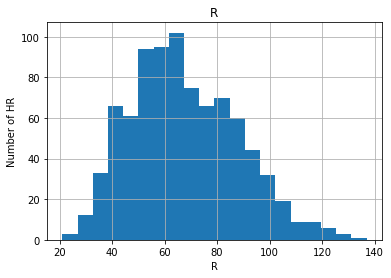

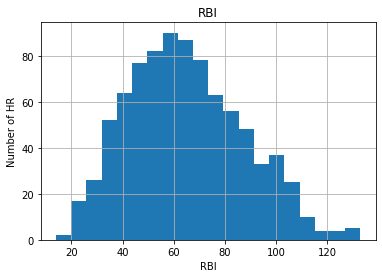

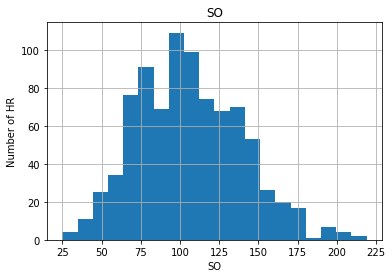

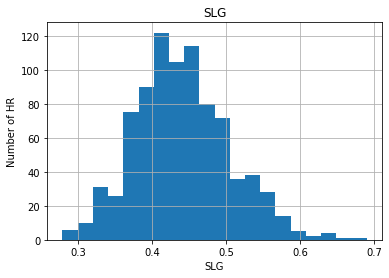

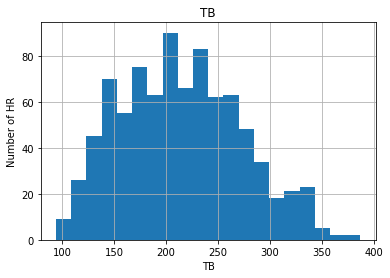

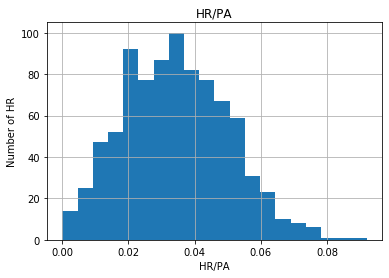

In [23]:
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of HR')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(df1, var)